<a href="https://colab.research.google.com/github/patricktapajos/python-data-science/blob/master/work_covid19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de tweets sobre a COVID-19**


# Apresentação



### Resumo
Este documento tem o objetivo de apresentar uma análise exploratória de tweets que envolvem o tema COVID-19, para extrair e visualizar informações úteis com o intuito de compreender as principais dúvidas das pessoas sobre esta pandemia.



### Autores
Alunos de pós-graduação em Ciência de Dados da Universidade do Estado do Amazonas:
1.   [Patrick Tapajós Pinto](https://www.linkedin.com/in/patrick-tapajos-pinto/)
2.   [Wladimir Barroso Guedes de Araújo Neto](https://www.linkedin.com/in/wladneto/)


### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no dercorrer do documento.

# 1. Introdução


O surto do COVID-19 na China foi noticiado em dezembro de 2019. A Organização Mundial de Saúde (OMS) declarou estado de emergência devido ao rápido espalhamento do vírus no mundo. Na América Latina, o Brasil é o país mais afetado pela doença. De acordo com o relatório pela OMS, houve o registro de 347,398 casos de infectados e de 22,013 mortes no Brasil.
<br>
Devido à rápida propagação da doença no mundo, as plataformas de mídias sociais como Twitter, Facebook e Instagram tornaram-se locais onde ocorre uma intensa e contínua troca de informações entre órgãos governamentais, profissionais da área de saúde e o público em geral.
Um representativo número de estudos científicos têm mostrado que as mídias sociais podem desempenhar um papel importante como fonte de dados para análise de crises e também para entender atitudes e comportamentos das pessoas durante uma pandemia.
<br>
Com o objetivo de auxiliar o monitoramento da saúde pública e também para dar suporte a tomada de decisão de profissionais, diversos sistemas de monitoramento são desenvolvidos para classificar grandes quantidades de dados oriundos das mídias sociais. Estes dados podem ser
empregados para identificar rapidamente os pensamentos, atitudes, sentimentos e tópicos que ocupam as mentes das pessoas em relação à pandemia do COVID-19. A análise sistemática desses dados pode ajudar os governantes, profissionais da saúde e o público em geral a identificar
questões que mais lhes interessam e tratá-las de maneira mais apropriada.
<br>
Dentre as plataformas de mídias sociais, o Twitter é uma das mais populares. De acordo com, existe aproximadamente 200 milhões de usuários registrados nesta plataforma e que publicam mais de 500 milhões de tweets diariamente. Portanto, pode-se aproveitar desse alto volume e troca frequente de informações para se conhecer as dúvidas sobre determinadas doenças. Como exemplo de importância desta plataforma em situações de crise, a atual pandemia de COVID-19 foi primeiro comunicada para a populacão na China através do site Weibo, que é o correspondente ao Twitter na China, antes mesmo do pronunciamento oficial das autoridades locais. Recentemente, existe um grande interesse de pesquisadores investigando o uso do Twitter para pesquisas relacionadas à saúde pública.


# 2. Coleta de Dados


Os dados foram disponibilizados pelo Prof. Dr. Tiago de Melo e contém cerca de 1.7 milhões de tweets coletados durante o primeiro semestre de 2020.
<br>
<br>
Link para download dos dados: http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz. 

# 3. Preparação: Importações e funções utilizadas

In [ ]:
# Importação das bibliotecas necessárias para a análise e visualização de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto de bibliotecas e programas para processamento simbólico e estatístico de linguagem natural 
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Biblioteca para tratar textos com acentuação
!pip install Unidecode
import unidecode

# Importação da biblioteca auxiliar do IGBE
!pip install ibge
from ibge.localidades import *

# Importação de bibliotecas auxiliares
import pprint
from collections import defaultdict

# Magic word, permite que os gráficos sejam mostrados diretamente no notebook
%matplotlib inline

# Download de módulo necessário para gerar WordCloud
nltk.download('stopwords')

# Download de módulo necessário para separar sentenças (sent-tokenize)
nltk.download('punkt')

     |████████████████████████████████| 245kB 4.4MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Montagem de drive para carregamento de dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Funções para geração de WordCloud com rápida visualização dos termos encontrados nos tweets (e por diversão :)) 

# Carregando as stopwords do idioma português
sw_br = stopwords.words('portuguese');

# Adicionando algumas encontradas no dataset
sw_br.extend(['http','https', 'né', 'vai','ser', 'pode', 'quer', 'até', 'pq','aí','oi','vem','lá','aqui','co'])

# Método para exclusão de stopwords e geração de lista com os termos encontrados
def gen_words(text_list):
  words = []
  for s in text_list:
    for p in word_tokenize(s.lower()):
      if p not in sw_br:
        words.append(p)
  words = ' '.join(words)
  return words

# Método para exibir a imagem com as palavras
def gen_img_word_cloud(text_list):
  wordcloud = WordCloud(width=1000, height=500, margin=0).generate(gen_words(text_list))
  plt.figure(figsize=(20, 11))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.margins(x=0, y=0)

# Método para verificar efetuar uma busca por um tema dentro de um dataset
def gen_df_by_search(df, subject, field):
  new_df = df[df[field].map(lambda tema: subject in tema)]
  return new_df
   
# Método para verificar a quantidade e o percentual de um tema dentro do dataset
def count_perc_df(df, subject, field):
  total = df[field].count()
  df = gen_df_by_search(df, subject, field)
  total_by_subject = df[field].count()
  perc = (total_by_subject/total)
  return (total_by_subject, perc)

# Método para retornar um dataframe agrupado por um campo de data, retornando a saída conforme o formato informado
def gen_group_by_data(df, date_field, format_date):
  return df.groupby(pd.to_datetime(df[date_field]).dt.strftime(format_date))

def gen_pivot_by_data_agg(df_param, subject, field):
  df = gen_df_by_search(df_param, subject, 'temas')
  df = df.groupby([field, pd.to_datetime(df['data']).dt.strftime('%m')]).agg(
    qtd_tweets=pd.NamedAgg(column=field, aggfunc="count")
  )
  df.reset_index(inplace=True)
  return df.pivot('data', field)['qtd_tweets']

# 4. Visão Geral dos Dados

## 4.1 Sobre a Base de Dados

Vamos efetuar o carregamento do dataset através do método read_csv, bastando informar o local do arquivo que contém os dados. 

In [ ]:
# Dados brutos da fonte
raw_data = pd.read_csv('/content/drive/Shared drives/pgds_dataset/covid19-tweets.csv')

# Atributo shape, informa a quantidade de linhas (registros) e colunas
print('Quantidade de dados %d, quantidade de colunas %d' % (raw_data.shape))

# Verificando se há dados NaN
print('Há dados nulos: ', raw_data.isnull().values.any())
print('Há dados nulos na coluna "texto": ', raw_data['texto'].isnull().values.any())

# Visualizando os dados
raw_data

Quantidade de dados 1658825, quantidade de colunas 13
Há dados nulos:  True
Há dados nulos na coluna "texto":  False


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


O dataset possui 1.658.825 registros, distribuídos entre 13 colunas, as quais contém dados sobre o texto do tweet, quem o escreveu, a data da escrita, sua localização, as 'hashtags' utilizadas, entre outras informações.
<br>
É possível verificar que algumas colunas possuem dados com o valor NaN, ou seja, não foi possível verificar um valor válido para determinado registro nesta coluna. Logo, nem todos os registros tem todos os dados preenchidos. Porém, a informação principal - o texto dos tweets - está completa.
<br>
Podemos utilizar a função describe para verificar alguns dados estatisticos do dataset. Neste caso, vamos utilizar em todo o dataset, então, para que ele processe dados do tipo String, iremos informar à função o parâmetro 'O', de Object.

In [ ]:
raw_data.describe(include = ['O'])

,data,usuario,apelido,texto,idioma,lugar,pais,sigla,hashtags
count,1658825,1658768,1658825,1658825,1658825,74605,74600,74595,1658825
unique,1202322,632601,774516,1653599,59,4500,121,120,63838
top,2020-04-15 21:00:00,.,Lusa_noticias,covid 19? desculpa eu entendi convite pra fica...,pt,Rio de Janeiro,Brazil,BR,[]
freq,27,1624,1404,120,1586796,8443,67247,67247,1495569


In [ ]:
# Porcentagem de tweets de língua portuguesa - não necessariamente o Brasil

total_tweets = raw_data['idioma'].count()
total_tweets_br = raw_data[raw_data['idioma'] == 'pt']['idioma'].count()

perc_br = (total_tweets_br/total_tweets)

print("Há {:.0%} de tweets com o idioma português.". format(perc_br))

total_city_tweets = raw_data['lugar'].count()
total_city_rj = raw_data[raw_data['lugar'] == 'Rio de Janeiro']['lugar'].count()
perc_rj = (total_city_rj/total_city_tweets)

print("Há {:.0%} de tweets da cidade do Rio de Janeiro.". format(perc_rj))


Há 96% de tweets com o idioma português.
Há 11% de tweets da cidade do Rio de Janeiro.


Podemos verificar a diferença entre os dados da linha **count** e da linha **unique**, que indica que há dados repetidos. 
<br>
No caso da data, por exemplo, podemos observar que foram escritos tweets (simultaneamente) em um mesmo horário 15-04-2020, às 21 horas 'em ponto', totalizando 27 vezes, como mostra a linha **freq**.
<br>
Já com relação à usuário, podemos inferir que um alguns tuitaram mais de uma vez. O mesmo para a coluna texto, a qual representa o tweet em si, que, dada a diferença entre os valores encontrados e os valores únicos, provavelmente alguns deles sejam retweets (de tweets que também se encontram no dataset). 
<br>
Podemos verificar que há tweets de 59 idiomas, sendo o mais presente o pt (português) com 96% deles, porém não há como afirmar que a origem foi o Brasil, pois esta informação não está completa no dataset - a coluna 'Pais' possui valores nulos. Apesar disso, entre os dados que continham a informação relativa ao lugar, a cidade do Rio de Janeiro foi a que mais apareceu, com 11% totais.


## 4.2 O Dataset DuvidasDB

As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas. Essa coleção de perguntas corresponde ao dataset "DuvidasDB".

In [ ]:
# Geração de dataset DuvidasDB, selecionando registros que apresentem perguntas na coluna 'texto', a qual refere-se ao tweet escrito pelo usuário
# Foi considerado como uma pergunta um texto que contenha o o ponto de interrogação (?), símbolo utilizado ao final de um pergunta. 

# Modificando o index para filtrar pelo texto, ajuda na performance
duvidas_db = raw_data.set_index('texto').filter(regex='\?+', axis=0)

# Reseta o index
duvidas_db.reset_index(inplace=True)

print('Quantidade de perguntas (mais de uma por registro): ', duvidas_db['texto'].count())

# Separa as sentenças em uma lista, com o auxílio do método apply do Pandas, sent_tokenize do pacote nltk e do lambda
# A expressão regular também filtrou por textos que contivessem texto além do símbolo (há muitos registros em que o texto é somente um ponto de interrogação).
duvidas_db['texto'] = duvidas_db['texto'].apply(lambda d: [(q) for q in sent_tokenize(d, language='portuguese') if re.search("[?+]", q)])

# Atributo que armazena as colunas para o merge de dataframes
vars = ['data', 'usuario', 'apelido', 'retweet', 'seguidores', 'idioma', 'lugar', 'pais', 'sigla', 'latitude', 'longitude', 'hashtags']

# Pulo do gato: 
# 1 - Apply: Transformar o campo texto em séries com apply, para separar o campo texto em colunas (uma para cada pergunta);
# 2 - Merge: Fazer o merge das colunas geradas, mantendo os índices;
# 3 - Melt: Transformar as colunas (do passo 1) em linhas. Os identificadores passados são as colunas do dataframe (atributo vars). Além disso, nomeamos o novo campo gerado como 'Pergunta'
# 4 - Drop: Deletar um atributo gerado pelo método melt, chamado 'variable'

duvidas_db = duvidas_db.texto.apply(pd.Series).merge(duvidas_db, left_index = True, right_index = True).drop(["texto"], axis = 1).melt(id_vars=vars, value_name='pergunta').drop("variable", axis = 1)

# A quantidade de colunas geradas foi o tamanho máximo de perguntas, e, como o número de perguntas não é uniforme no texto, gerou alguns valores NaN nessa coluna, os quais serão retirados
duvidas_db.dropna(subset=['pergunta'], inplace=True)

print('Quantidade de perguntas (uma por registro): ', duvidas_db['pergunta'].count())
# Reseta o index
duvidas_db.reset_index(inplace=True, drop=True)

# Retirando as perguntas duplicadas
duvidas_db = duvidas_db[~duvidas_db.duplicated(subset=['pergunta'])]
# duvidas_db.drop_duplicates(subset=['pergunta'], inplace=True)

print('Quantidade de perguntas sem duplicação: ', duvidas_db['pergunta'].count())

duvidas_db

Quantidade de perguntas (mais de uma por registro):  172501
Quantidade de perguntas (uma por registro):  206950
Quantidade de perguntas sem duplicação:  185966


,data,usuario,apelido,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,pergunta
0,2020-03-23 18:51:14,Gaboardi,fraslee,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],@BolsonaroSP Cade o fundão deputado???
1,2020-04-01 21:11:07,🚩,santosodeto,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],Fumaça de cigarro pode propagar coronavírus?
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],@ipratesMD @dr_pampers Será que corremos o ris...
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",Prioridade ?!
4,2020-03-30 00:43:36,Valnei do Val,vdoval,0,201,pt,NaN,NaN,NaN,NaN,NaN,[],"Que tal uma notícia boa, indo na contramão do ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206945,2020-05-15 20:01:03,Jennifer Oliveira,jennifer_Djey,1,230,pt,NaN,NaN,NaN,NaN,NaN,[],Doméstica?
206946,2020-05-18 18:28:59,é istu,analivnuns,0,186,pt,NaN,NaN,NaN,NaN,NaN,[],saudade?
206947,2020-02-13 21:45:36,Matheus 🏴🚩,maatheus_rj,0,329,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],✅\nSalsicha?
206948,2020-05-18 18:28:59,é istu,analivnuns,0,186,pt,NaN,NaN,NaN,NaN,NaN,[],raiva?


In [ ]:
# Quantidade de perguntas em relação aos dados do dataset

total_raw_tweets = raw_data['texto'].count()
total_duvidas_tweets = duvidas_db['pergunta'].count()
perc_perg_tweets = (total_duvidas_tweets/total_raw_tweets)

print("{:.0%} dos textos no dataset são questionamentos.". format(perc_perg_tweets))

11% dos textos no dataset são questionamentos.


# 5. Análise dos Temas discutidos

## 5.1 Visão rápida de termos encontrados - WordCloud

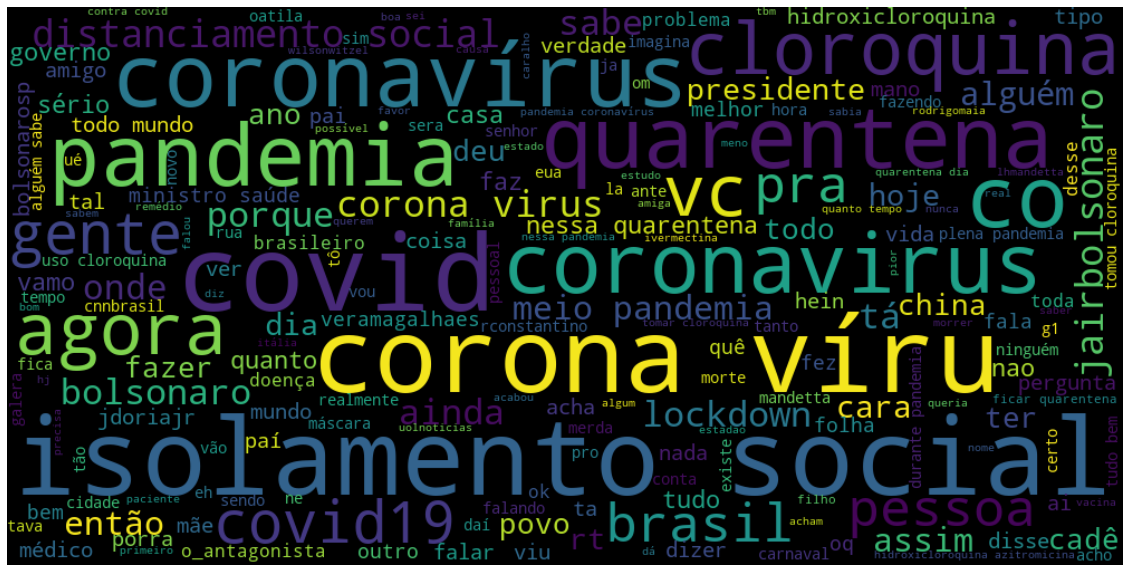

In [ ]:
gen_img_word_cloud(duvidas_db['pergunta'])

Ao processarmos os dados dos tweets e extrairmos somente as informações sobre os questionamentos gerados, encontrados 206.950 perguntas. O WordCloud gerado acima apresenta alguns dos termos mais escritos em destaque, como por exemplo 'covid 19', 'quarentena', 'pandemia', 'coronavirus', 'isolamento social', além de nomes de medicamentos como 'hidroxicloroquina', 'cloroquina' e 'azitromicina', e nomes de jornalistas e do presidente da república.


## 5.2 Análise por Tema

Vamos olhar mais atentamente alguns temas envolvidos nestes questionamentos.
<br>
Agruparemos os tweets em 4 temas:

1. Doença
2. Medicamentos
3. Organizações 
4. Pessoas

In [ ]:
# Vamos criar uma nova coluna, que conterá a informação de qual tema a pergunta aborda

# Termos para comparar com a pergunta conforme cada tema
# 1 - Doença
termo_doenca = 'covid|corona|coronga|coronavirus|febre|tosse|cansaco|respiracao|\bdor\b|fadiga'
# 2 - Medicamentos
termo_med = 'ivermectina|tamiflu|azitromicina|cloroquina|tratamento|medicamento|medicacao|vacina|comprimido|pilula|tomar'
# 3 - Organizações
termo_org = 'tv|radio|globo|estadao|band|cnn|sbt|ministerio|onu|uol|oms'
# 4 - Pessoas
termo_pessoas = 'jornalista|ministro|politic|presidente|deputad|celebridade|famoso|bolsonaro|jair|mandetta|teich|atila|doria|wilson'


# Criação de classe para armazenar constante para cada tema
class Tema:
  DOENCA        = 1
  MEDICAMENTOS  = 2
  ORG           = 3
  PESSOAS       = 4
  OUTROS        = 0

# Método para verificar com em temas a pergunta se encaixa. 
# Detalhe: uma pergunta pode estar relacionada à mais de um tema.

def temas(pergunta):
  temas = []
  d_temas_termo = {
      Tema.DOENCA: termo_doenca,
      Tema.MEDICAMENTOS: termo_med,
      Tema.ORG: termo_org,
      Tema.PESSOAS: termo_pessoas
  }

  for k in d_temas_termo:
    if re.search(unidecode.unidecode(d_temas_termo[k]), unidecode.unidecode(pergunta), re.I):
      temas.append(k)
  if(len(temas) == 0):
    temas.append(Tema.OUTROS)

  return temas

# Criação da coluna
duvidas_db['temas'] =  duvidas_db['pergunta'].apply(lambda p: temas(p))

duvidas_db

,data,usuario,apelido,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,pergunta,temas
0,2020-03-23 18:51:14,Gaboardi,fraslee,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],@BolsonaroSP Cade o fundão deputado???,[4]
1,2020-04-01 21:11:07,🚩,santosodeto,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],Fumaça de cigarro pode propagar coronavírus?,[1]
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],@ipratesMD @dr_pampers Será que corremos o ris...,[0]
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",Prioridade ?!,[0]
4,2020-03-30 00:43:36,Valnei do Val,vdoval,0,201,pt,NaN,NaN,NaN,NaN,NaN,[],"Que tal uma notícia boa, indo na contramão do ...",[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206945,2020-05-15 20:01:03,Jennifer Oliveira,jennifer_Djey,1,230,pt,NaN,NaN,NaN,NaN,NaN,[],Doméstica?,[0]
206946,2020-05-18 18:28:59,é istu,analivnuns,0,186,pt,NaN,NaN,NaN,NaN,NaN,[],saudade?,[0]
206947,2020-02-13 21:45:36,Matheus 🏴🚩,maatheus_rj,0,329,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],✅\nSalsicha?,[0]
206948,2020-05-18 18:28:59,é istu,analivnuns,0,186,pt,NaN,NaN,NaN,NaN,NaN,[],raiva?,[0]


### 5.2.1 Doença

In [ ]:
# Dentro do dataset duvidas_db, o percentual de perguntas sobre a doença
count, perc_doenca_tweets = count_perc_df(duvidas_db, Tema.DOENCA, 'temas')
print("{:.1%} das perguntas no dataset são questionamentos sobre a doença.". format(perc_doenca_tweets))

26.5% das perguntas no dataset são questionamentos sobre a doença.


### 5.2.2 Medicamentos

In [ ]:
# Dentro do dataset duvidas_db, o percentual de perguntas sobre medicamentos
count, perc_med_tweets = count_perc_df(duvidas_db, Tema.MEDICAMENTOS, 'temas')
print("{:.1%} das perguntas no dataset são questionamentos sobre medicamentos.". format(perc_med_tweets))

11.0% das perguntas no dataset são questionamentos sobre medicamentos.


### 5.2.3 Organizações

In [ ]:
#Dentro do dataset duvidas_db, o percentual de perguntas sobre organizações
count, perc_org_tweets = count_perc_df(duvidas_db, Tema.ORG, 'temas')
print("{:.1%} das perguntas no dataset são questionamentos sobre organizações.". format(perc_org_tweets))

3.7% das perguntas no dataset são questionamentos sobre organizações.


### 5.2.4 Pessoas

In [ ]:
#Dentro do dataset duvidas_db, o percentual de perguntas sobre pessoas
count, perc_pessoas_tweets = count_perc_df(duvidas_db, Tema.PESSOAS, 'temas')
print("{:.1%} das perguntas no dataset são questionamentos sobre pessoas.". format(perc_pessoas_tweets))

9.9% das perguntas no dataset são questionamentos sobre pessoas.


## 5.3 Outros Temas

In [ ]:
# Dentro do dataset duvidas_db, o percentual de perguntas sobre outros temas
count, perc_rest_tweets = count_perc_df(duvidas_db, Tema.OUTROS, 'temas')
print("{:.1%} das perguntas no dataset são questionamentos sobre outros assuntos.". format(perc_rest_tweets))

56.1% das perguntas no dataset são questionamentos sobre outros assuntos.


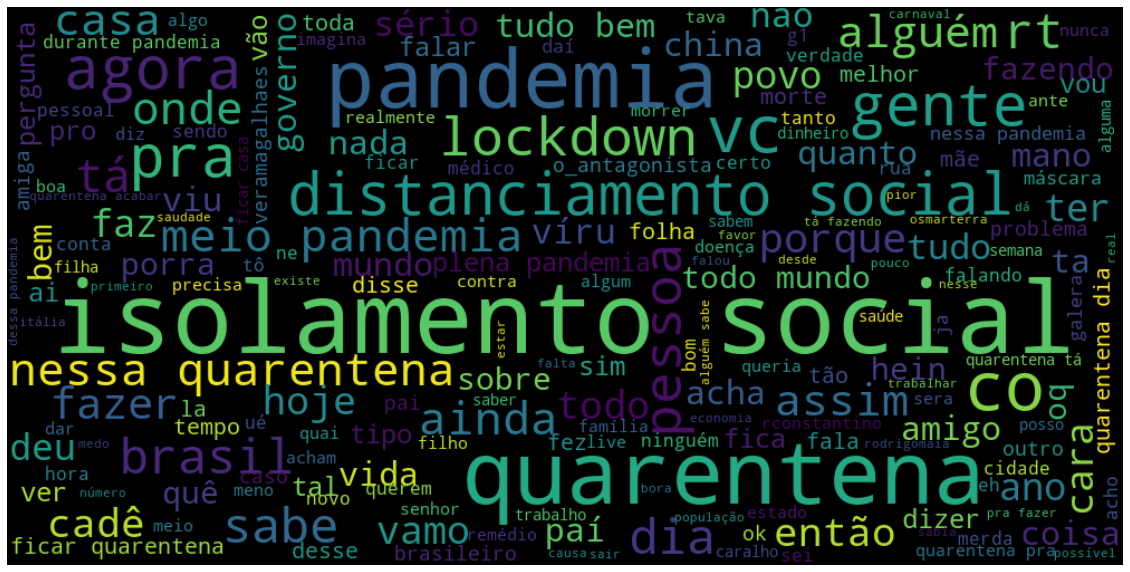

In [ ]:
duvidas_restantes = gen_df_by_search(duvidas_db, Tema.OUTROS, 'temas')
gen_img_word_cloud(duvidas_restantes['pergunta'])

Observando as informações dos tópicos acima, percebe-se que a dúvida mais presente das pessoas, dentre os temas sugeridos, foi 'Doença', seguido de 'Medicamentos', 'Pessoas' e finalmente 'Organizações'. As pessoas tiveram grandes dúvidas sobre o que era a COVID-19, provavelmente na tentativa de entender o porquê de tanto alarde sobre a mesma. Em seguida, dúvidas sobre quais os tratamentos, medicações, meios de curar-se da doença. Por conseguinte, questionamentos direcionados a pessoas envolvidas, tanto na questão política, quanto na área de saúde. E por fim, questionamentos sobre organizações.
<br>
Mesmo tendo uma quantidade significativa de questionamentos sobre a doença, aproximadamente 56% destas perguntas foram sobre outros temas. Como pode-se observar na figura acima, alguns dos termos mais comentados foram **isolamento social**, **quarentena** e **distanciamento social**, algumas medidas para a contenção da epidemia e que mudou o dia-a-dia de todo mundo.

# 6. Tweets ao longo do tempo

Observemos a distribuição de tweets ao longo do tempo, tanto dos dados gerais de perguntas, como dos dados divididos nos tópicos anteriores.

## 6.1 Distribuição temporal de tweets

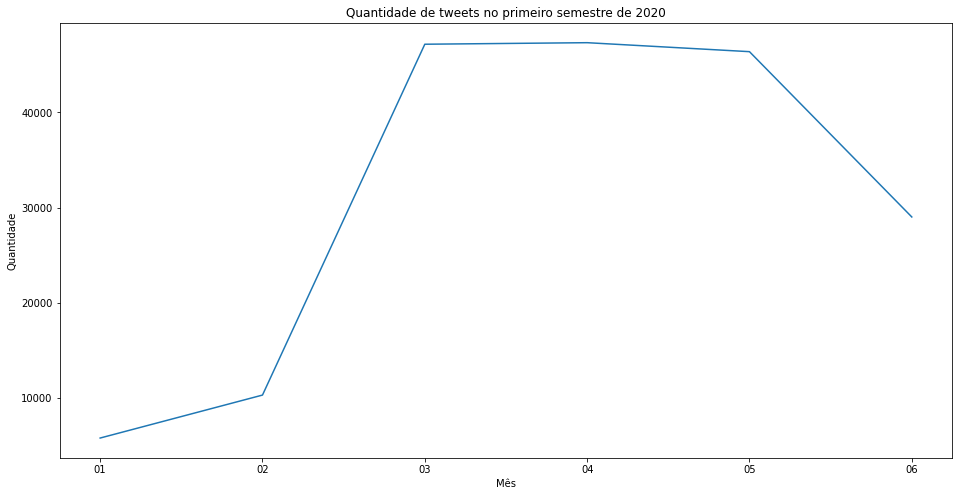

In [ ]:
# Quantidade de tweets por mês
df_date = gen_group_by_data(duvidas_db, 'data', '%m')['data'].count()
df_date
plt.figure(figsize=(16,8))
plt.title('Quantidade de tweets no primeiro semestre de 2020')
plt.plot(df_date)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.show()

Observando o gráfico anterior, podemos visualizar que em janeiro já havia uma quantidade considerável de tweets, provavelmente devido às notícias sobre os primeiros casos de COVID-19, ocorridos em Dezembro de 2019.
<br>
Como vimos anteriormente, o Brasil foi o país que mais produziu tweets. Levando isso em consideração, o aumento na quantidade ao longo dos meses seguintes podem estar relacionados à notícias como o Projeto de Lei para a quarentena, aprovado pelo Congresso Nacional e o primeiro caso de COVID-19 registrado no país, no final de fevereiro - inclusive o pico (ponto mais alto) ocorreu nesse período, final de fereveiro e início de março.
<br>
Fonte das informações: https://coronavirus.saude.gov.br/linha-do-tempo/. 
<br>

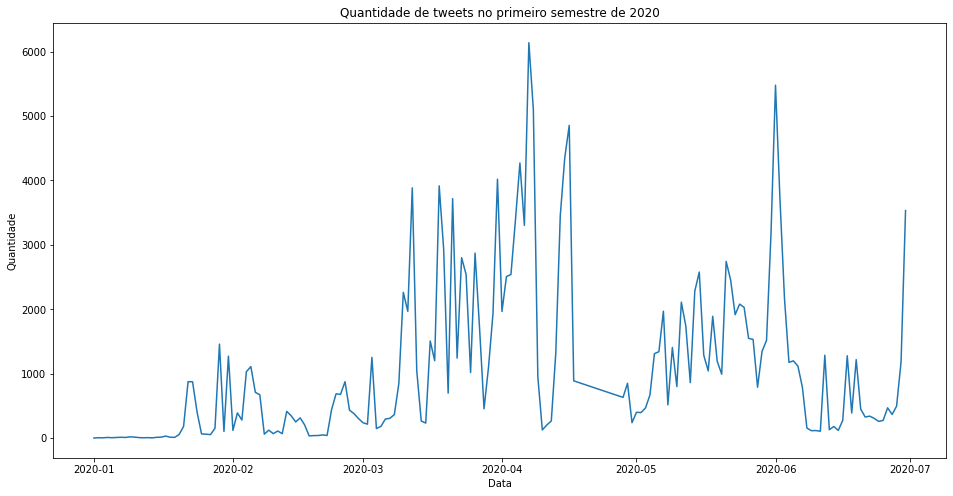

In [ ]:
# Quantidade de tweets por dias (sem contar a hora, minuto e segundo)
df_date = duvidas_db.groupby(pd.to_datetime(duvidas_db['data']).dt.date)['data'].count()
df_date
plt.figure(figsize=(16,8))
plt.title('Quantidade de tweets no primeiro semestre de 2020')
plt.plot(df_date)
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
maxdf = duvidas_db.groupby(pd.to_datetime(duvidas_db['data']).dt.date)['data'].count()
maxdf.idxmax()


datetime.date(2020, 4, 7)

Quando visualizamos a quantidade em relação ao dia, podemos verificar que também ocorreu no mês de março, especificamente no dia 07-04-2020.

## 6.2 Distribuição temporal de tweets por tema

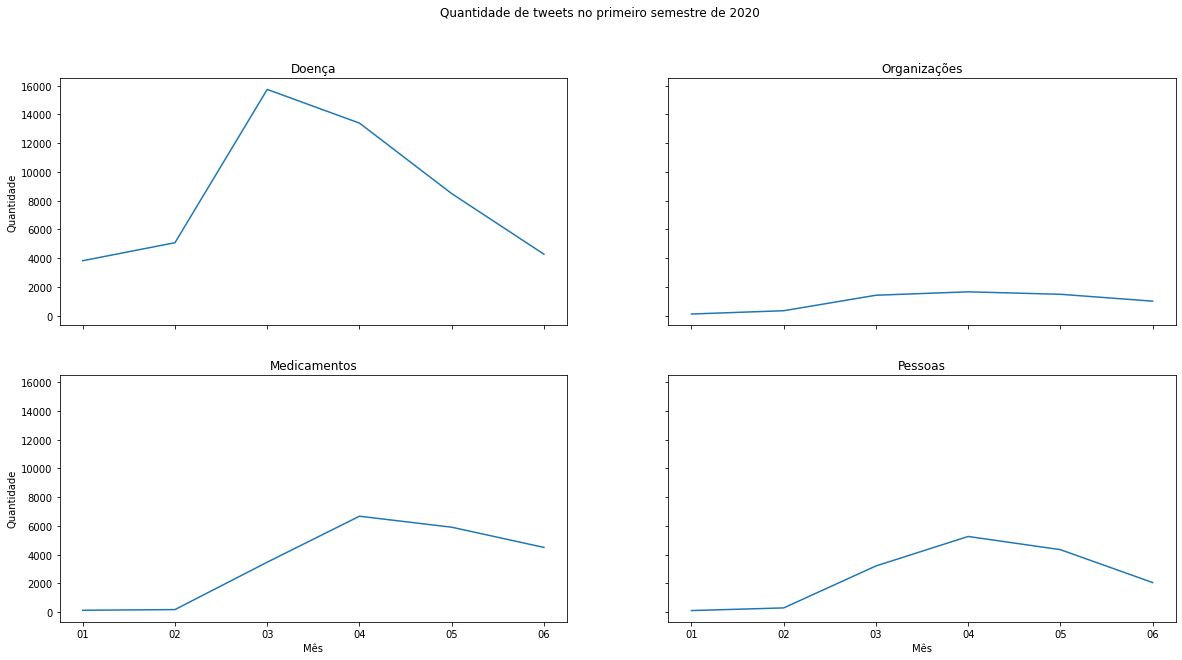

In [ ]:
# Quantidade de tweets por dias (sem contar a hora, minuto e segundo) - com relação aos tópicos abordados anteriormente
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,10))
fig.suptitle('Quantidade de tweets no primeiro semestre de 2020')

df_date_doencas = gen_group_by_data(gen_df_by_search(duvidas_db, Tema.DOENCA, 'temas'), 'data', '%m')['data'].count()
df_date_med = gen_group_by_data(gen_df_by_search(duvidas_db, Tema.MEDICAMENTOS, 'temas'), 'data', '%m')['data'].count()
df_date_org = gen_group_by_data(gen_df_by_search(duvidas_db, Tema.ORG, 'temas'), 'data', '%m')['data'].count()
df_date_pessoas = gen_group_by_data(gen_df_by_search(duvidas_db, Tema.PESSOAS, 'temas'), 'data', '%m')['data'].count()

axs[0,0].set_title('Doença');
axs[0,0].plot(df_date_doencas)

axs[1,0].set_title('Medicamentos');
axs[1,0].plot(df_date_med)

axs[0,1].set_title('Organizações');
axs[0,1].plot(df_date_org)

axs[1,1].set_title('Pessoas');
axs[1,1].plot(df_date_pessoas)

for ax in axs.flat:
    ax.set(xlabel='Mês', ylabel='Quantidade')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

# 7. Análise Geográfica

Uma forma interessante de avaliar nossa base de dados é fazer uma análise geográfica dos dados contidos na mesma. Com isso, nosso objetivo é entender que cidades ou regiões possuem maior participação nos dados coletados, bem como que temas são mais abordados em cada uma dessas regiões.

Antes de mais nada, porém, vamos fazer algumas mudanças em nosso banco de dados. Mais especificamente, vamos agregar duas colunas à base, uma com o estado e uma com a região de origem de cada tweet. Para isso, vamos primeiro criar um dicionário contendo o mapeamento de municipios do Brasil com informações referentes aos mesmos. Isso é feito utilizando um pacote chamado ibge [2], responsável por comunicar-se com a API oficial do IBGE.

In [ ]:
municipios_dict = {unidecode.unidecode(municipio['nome']).lower(): municipio for municipio in Municipios().json()}
print(municipios_dict)

{"alta floresta d'oeste": {'id': 1100015, 'nome': "Alta Floresta D'Oeste", 'microrregiao': {'id': 11006, 'nome': 'Cacoal', 'mesorregiao': {'id': 1102, 'nome': 'Leste Rondoniense', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}, 'ariquemes': {'id': 1100023, 'nome': 'Ariquemes', 'microrregiao': {'id': 11003, 'nome': 'Ariquemes', 'mesorregiao': {'id': 1102, 'nome': 'Leste Rondoniense', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}, 'cabixi': {'id': 1100031, 'nome': 'Cabixi', 'microrregiao': {'id': 11008, 'nome': 'Colorado do Oeste', 'mesorregiao': {'id': 1102, 'nome': 'Leste Rondoniense', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}, 'cacoal': {'id': 1100049, 'nome': 'Cacoal', 'microrregiao': {'id': 11006, 'nome': 'Cacoal', 'mesorregiao': {'id': 1102, 'nome': 'Leste Rondoniense', 'UF': {'id': 11, 'sigla': 'RO

Com o dicionário pronto, vamos utilizar também dois métodos que serão responsáveis por buscar as informações que precisamos do dicionário.

In [ ]:
def getEstado(municipio):
  municipio = unidecode.unidecode(municipio).lower()
  if municipio in municipios_dict.keys():
    return municipios_dict[municipio]['microrregiao']['mesorregiao']['UF']['nome']
  else:
    return 'outros'

def getRegiao(municipio):
  municipio = unidecode.unidecode(municipio).lower()
  if municipio in municipios_dict.keys():
    return municipios_dict[municipio]['microrregiao']['mesorregiao']['UF']['regiao']['nome']
  else:
    return 'outros'

Feito isso, vamos primeiro limitar nosso banco à cidades brasileiras para, então, gerar as informações novas. Sem antes, claro, remover da nossa base os registros cujo campo 'lugar' esteja vazio.

In [ ]:

duvidas_local = duvidas_db.copy(deep=True)
duvidas_local = duvidas_local.loc[duvidas_local['pais'] == 'Brazil']
duvidas_local.dropna(subset=['lugar'], inplace=True)

duvidas_local['estado'] = [getEstado(cidade) for cidade in duvidas_local['lugar']]
duvidas_local['regiao'] = [getRegiao(cidade) for cidade in duvidas_local['lugar']]

duvidas_local

,data,usuario,apelido,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,pergunta,temas,estado,regiao
6,2020-04-13 19:16:51,Gus,arrombagus,3,253,pt,Santos,Brazil,BR,NaN,NaN,[],"""Nova York é o novo epicentro da pandemia de c...",[1],São Paulo,Sudeste
23,2020-05-19 06:11:08,Sher Machado,transcurecer,14,21791,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],É muita coisa acontecendo nos últimos dias e p...,[0],Rio de Janeiro,Sudeste
63,2020-06-01 22:06:10,Diego M 🇪🇪,_Manhaguanha,0,892,pt,São Lourenço do Oeste,Brazil,BR,NaN,NaN,[],Povo de São Lourenço já leram os comentários n...,[1],Santa Catarina,Sul
115,2020-06-28 02:30:31,De cola,_niseoliveira,0,590,pt,Itu,Brazil,BR,NaN,NaN,[],Certeza que vocês estão cumprindo com o isolam...,[0],São Paulo,Sudeste
123,2020-04-02 20:40:12,.Nathi 🐨,nathalisicuro,0,964,pt,Joinville,Brazil,BR,NaN,NaN,[],Cê quer apanhar agora ou depois do surto de co...,[1],Santa Catarina,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206904,2020-05-06 23:51:55,Carlos Wilker 🇺🇳,CarlosWilker79,0,54,pt,Buerarema,Brazil,BR,NaN,NaN,[],Se as aulas estão TODAS suspensas?,[0],Bahia,Nordeste
206914,2020-02-13 21:45:36,Matheus 🏴🚩,maatheus_rj,0,329,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],✅\nJiló?,[0],Rio de Janeiro,Sudeste
206939,2020-02-13 21:45:36,Matheus 🏴🚩,maatheus_rj,0,329,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],✅\nLentilha?,[0],Rio de Janeiro,Sudeste
206944,2020-02-13 21:45:36,Matheus 🏴🚩,maatheus_rj,0,329,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],✅\nGrão de bico?,[0],Rio de Janeiro,Sudeste


## 7.1 Distribuição geral de tweets

Primeiramente, vamos avaliar como está a distribuição dos tweets em cidades. Mais especificamente, vamos exibir quais as 15 cidades que mais geraram tweets sobre o Covid-19 durante o primeiro semestre de 2020.

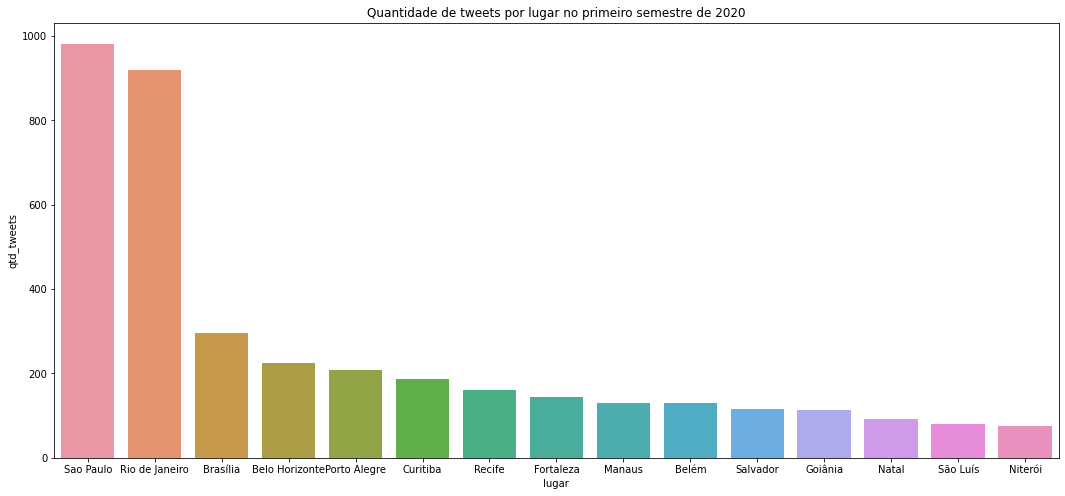

In [ ]:
# Quantidade de tweets por cidade

# Cópia dos dados
df_cidade = duvidas_local.copy(deep=True)
df_cidade = df_cidade.groupby(["lugar"]).agg(
    qtd_tweets=pd.NamedAgg(column="lugar", aggfunc="count")
)
df_cidade.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_cidade.reset_index(inplace=True)

dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Quantidade de tweets por lugar no primeiro semestre de 2020')
ax = sns.barplot(x="lugar", y="qtd_tweets", data=df_cidade.iloc[0:15])


Como é possível ver, São Paulo e Rio de Janeiro apresentam números muito acima das outras cidades da lista. Tal fato é explicado, principalmente, pela diferença no número de habitantes nessas cidades.

Vamos avaliar agora como está a distribuição quando agregamos os resultados por estados:

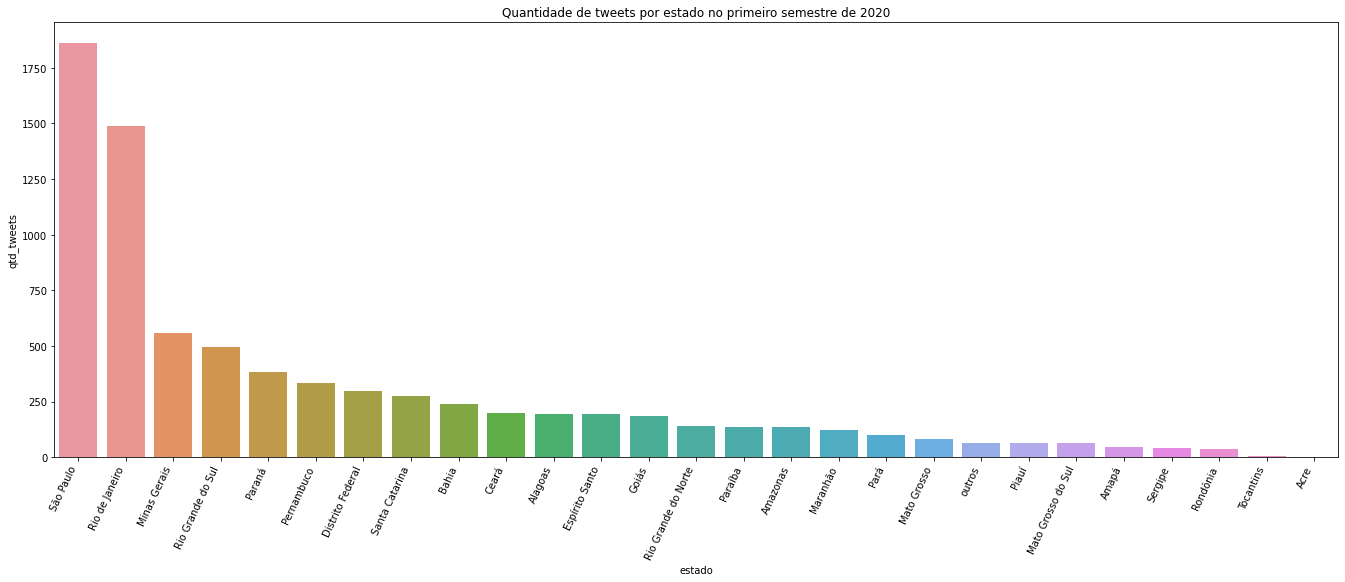

In [ ]:
# Quantidade de tweets por estado

df_estado = duvidas_local.copy(deep=True)
df_estado = df_estado.groupby(["estado"]).agg(
    qtd_tweets=pd.NamedAgg(column="estado", aggfunc="count")
)
df_estado.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_estado.reset_index(inplace=True)

dims = (23, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Quantidade de tweets por estado no primeiro semestre de 2020')

e_chart = sns.barplot(x="estado", y="qtd_tweets", data=df_estado.iloc[0:27])
e_chart.set_xticklabels(e_chart.get_xticklabels(), rotation=65, horizontalalignment='right')
ax = e_chart


Vejamos os dados agregados por região:

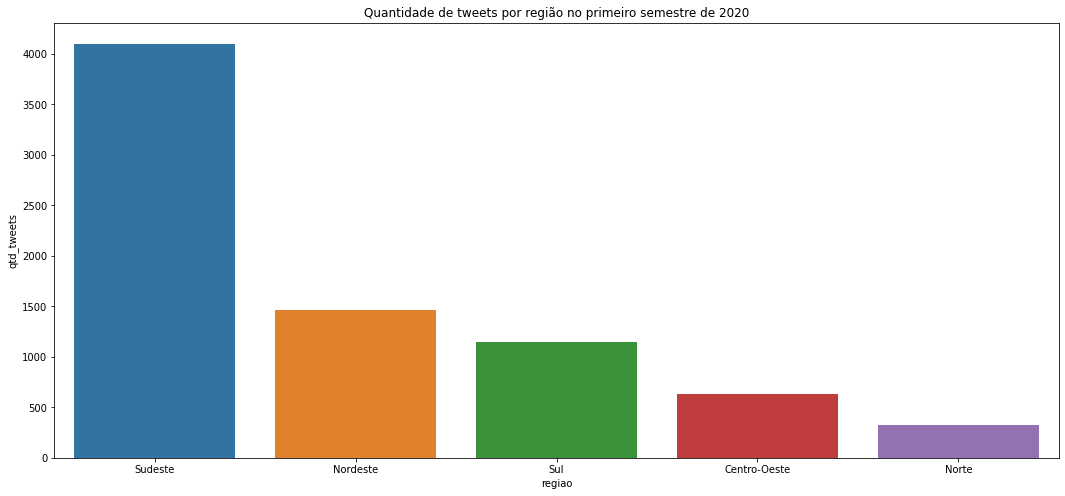

In [ ]:
# Quantidade de tweets por região

df_regiao = duvidas_local.copy(deep=True)
df_regiao = df_regiao.groupby(["regiao"]).agg(
    qtd_tweets=pd.NamedAgg(column="regiao", aggfunc="count")
)
df_regiao.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_regiao.reset_index(inplace=True)

dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Quantidade de tweets por região no primeiro semestre de 2020')
ax = sns.barplot(x="regiao", y="qtd_tweets", data=df_regiao.iloc[0:5])

Por fim, vejamos a distribuição temporal por estado.

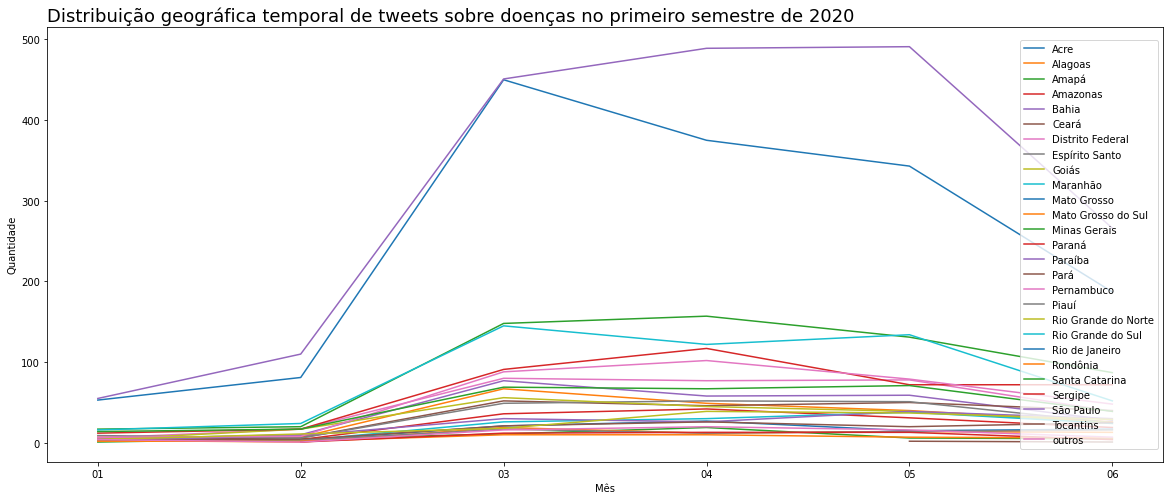

In [ ]:
df_temp_estado = duvidas_local.copy(deep=True)
df_temp_estado = df_temp_estado.groupby(['estado', pd.to_datetime(df_temp_estado['data']).dt.strftime('%m')]).agg(
    qtd_tweets=pd.NamedAgg(column="estado", aggfunc="count")
)
df_temp_estado.reset_index(inplace=True)
df_temp_estado = df_temp_estado.pivot('data', 'estado')['qtd_tweets']

dims = (20, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre doenças no primeiro semestre de 2020', fontsize=18, loc='left')

for estado in df_temp_estado:
    plt.plot(df_temp_estado[estado], label=estado)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend(loc='center right');

## 7.2 Distribuição de tweets por Tema

Agora que temos uma idéia da distribuição geral dos tweets, vejamos a distribuição com relação aos temas apresentados anteriormente.

### 7.2.1 Doenças

#### 7.2.1.1 Distribuição por cidades

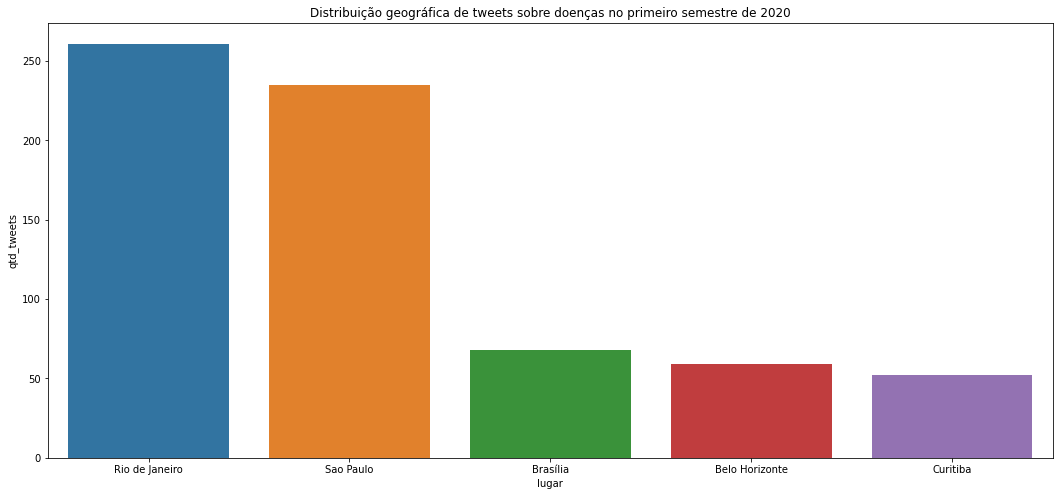

In [ ]:
df_cidade_doencas = gen_df_by_search(duvidas_local, Tema.DOENCA, 'temas')
df_cidade_doencas = df_cidade_doencas.groupby(["lugar"]).agg(
    qtd_tweets=pd.NamedAgg(column="lugar", aggfunc="count")
)
df_cidade_doencas.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_cidade_doencas.reset_index(inplace=True)

dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica de tweets sobre doenças no primeiro semestre de 2020')
ax = sns.barplot(x="lugar", y="qtd_tweets", data=df_cidade_doencas.iloc[0:5])

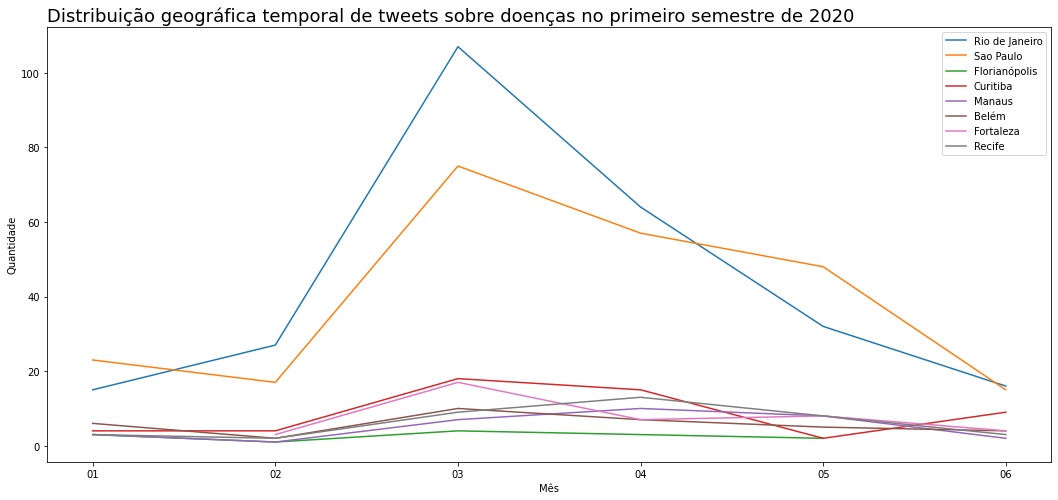

In [ ]:
# Distribuição temporal por cidade
df_temp_lugar_doencas = gen_pivot_by_data_agg(duvidas_local, field='lugar', subject=Tema.DOENCA)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre doenças no primeiro semestre de 2020', fontsize=18, loc='left')
cidades_doenca_search = ['Rio de Janeiro', 'Sao Paulo', 'Florianópolis', 'Curitiba', 'Manaus', 'Belém', 'Fortaleza', 'Recife']
for cidade in cidades_doenca_search:
  plt.plot(df_temp_lugar_doencas[cidade], label=cidade)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

#### 7.2.1.1 Distribuição por regiões

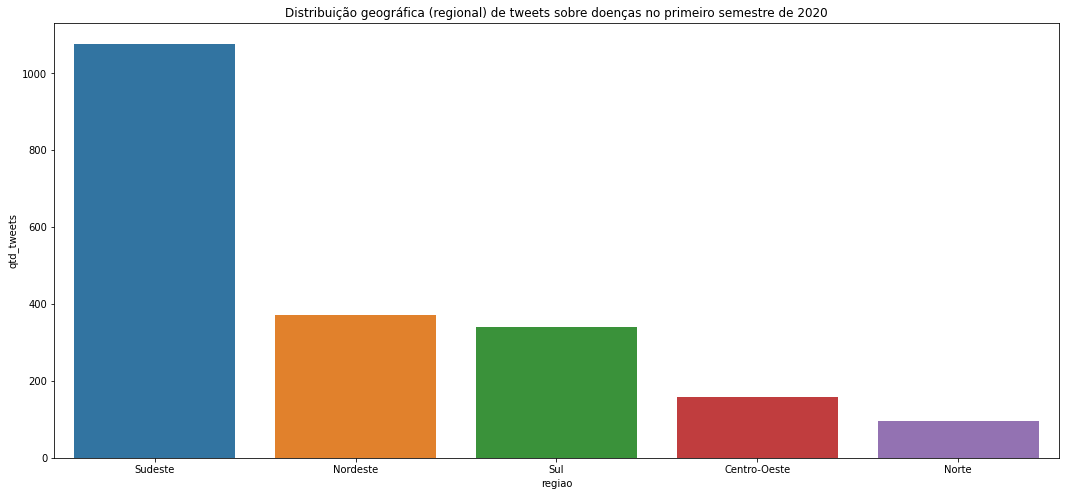

In [ ]:
df_regiao_doencas = gen_df_by_search(duvidas_local, Tema.DOENCA, 'temas')
df_regiao_doencas = df_regiao_doencas.groupby(["regiao"]).agg(
    qtd_tweets=pd.NamedAgg(column="regiao", aggfunc="count")
)
df_regiao_doencas.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_regiao_doencas.reset_index(inplace=True)

dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica (regional) de tweets sobre doenças no primeiro semestre de 2020')
ax = sns.barplot(x="regiao", y="qtd_tweets", data=df_regiao_doencas.iloc[0:5])

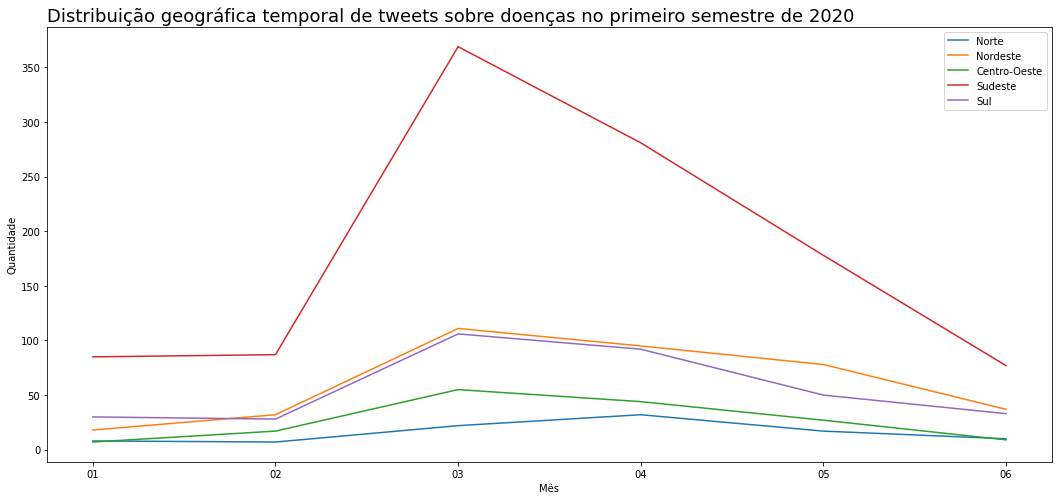

In [ ]:
# Distribuição temporal por região
df_temp_regiao_doencas = gen_pivot_by_data_agg(duvidas_local, field='regiao', subject=Tema.DOENCA)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre doenças no primeiro semestre de 2020', fontsize=18, loc='left')
regioes_doenca_search = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
for regiao in regioes_doenca_search:
  plt.plot(df_temp_regiao_doencas[regiao], label=regiao)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

### 7.2.2 Medicamentos

#### 7.2.2.1 Distribuição por cidades

In [ ]:
df_cidade_med = gen_df_by_search(duvidas_local, Tema.MEDICAMENTOS, 'temas')
df_cidade_med = df_cidade_med.groupby(["lugar"]).agg(
    qtd_tweets=pd.NamedAgg(column="lugar", aggfunc="count")
)
df_cidade_med.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_cidade_med.reset_index(inplace=True)

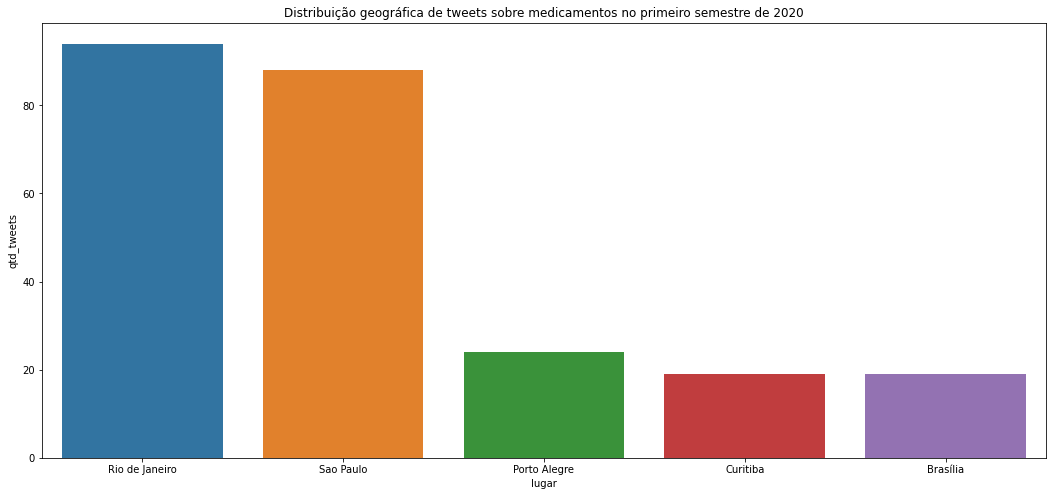

In [ ]:
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica de tweets sobre medicamentos no primeiro semestre de 2020')
ax = sns.barplot(x="lugar", y="qtd_tweets", data=df_cidade_med.iloc[0:5])

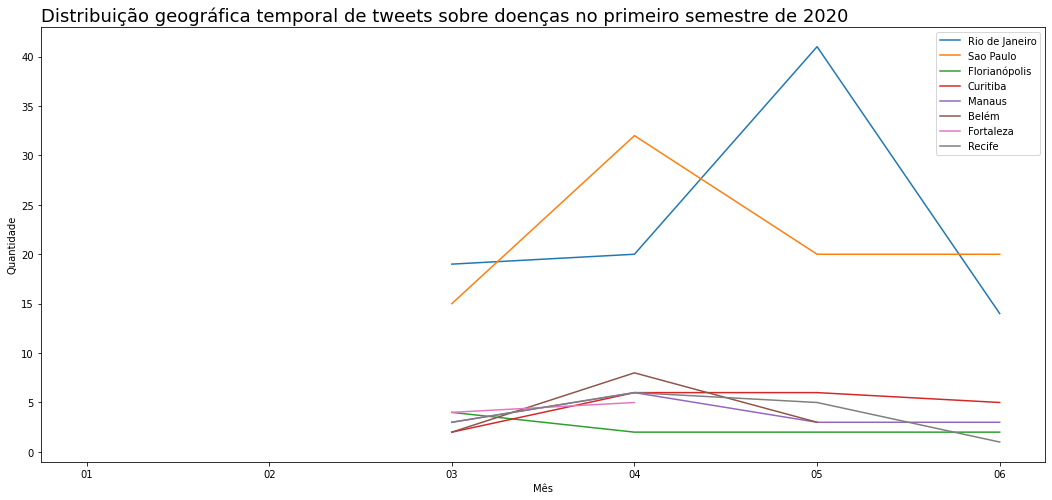

In [ ]:
# Distribuição temporal por cidade
df_temp_lugar_med = gen_pivot_by_data_agg(duvidas_local, field='lugar', subject=Tema.MEDICAMENTOS)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre doenças no primeiro semestre de 2020', fontsize=18, loc='left')
cidades_med_search = ['Rio de Janeiro', 'Sao Paulo', 'Florianópolis', 'Curitiba', 'Manaus', 'Belém', 'Fortaleza', 'Recife']
for cidade in cidades_med_search:
  plt.plot(df_temp_lugar_med[cidade], label=cidade)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

#### 7.2.2.2 Distribuição por regiões

In [ ]:
#TODO Verificar distribuição total por região

In [ ]:
df_regiao_med = gen_df_by_search(duvidas_local, Tema.MEDICAMENTOS, 'temas')
df_regiao_med = df_regiao_med.groupby(["regiao"]).agg(
    qtd_tweets=pd.NamedAgg(column="regiao", aggfunc="count")
)
df_regiao_med.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_regiao_med.reset_index(inplace=True)

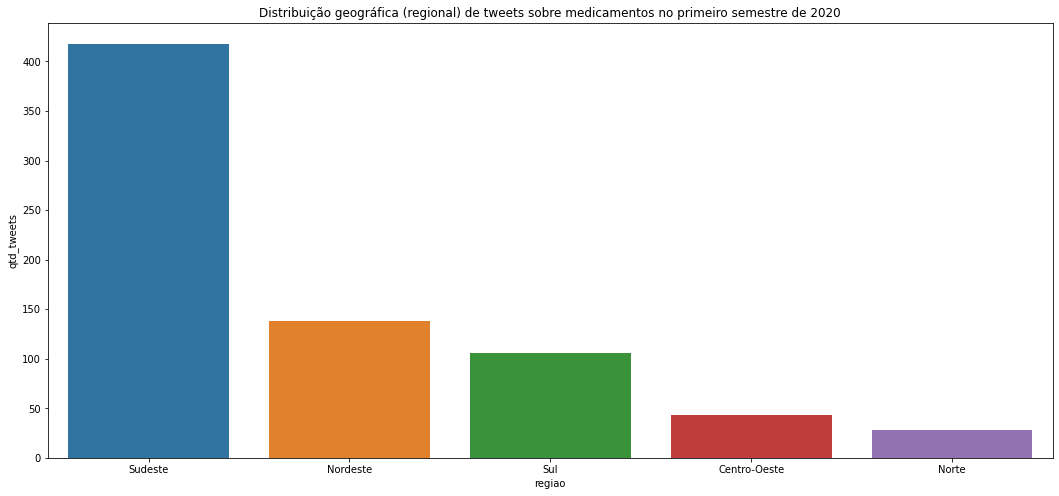

In [ ]:
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica (regional) de tweets sobre medicamentos no primeiro semestre de 2020')
ax = sns.barplot(x="regiao", y="qtd_tweets", data=df_regiao_med.iloc[0:5])

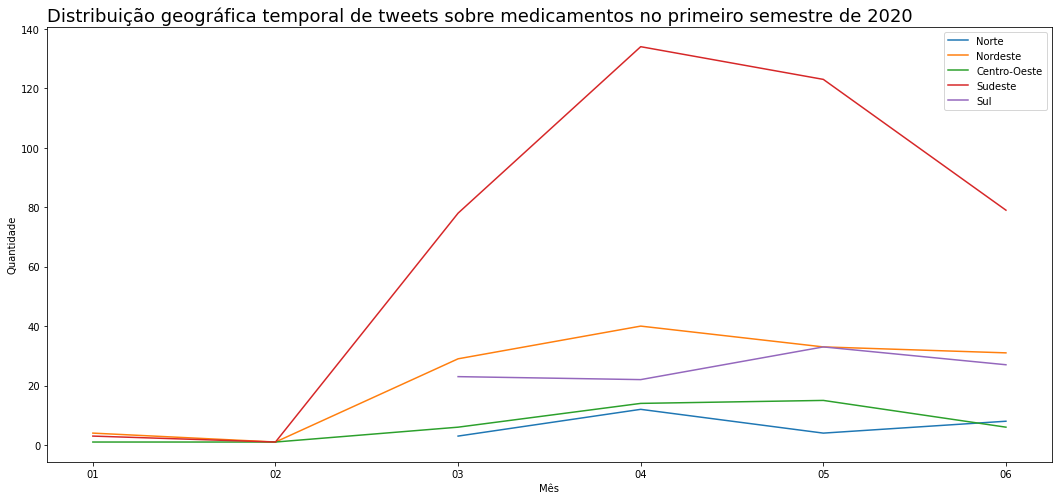

In [ ]:
# Distribuição temporal por região
df_temp_regiao_med = gen_pivot_by_data_agg(duvidas_local, field='regiao', subject=Tema.MEDICAMENTOS)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre medicamentos no primeiro semestre de 2020', fontsize=18, loc='left')
regioes_med_search = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
for regiao in regioes_med_search:
  plt.plot(df_temp_regiao_med[regiao], label=regiao)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

### 7.2.3 Organizações

#### 7.2.3.1 Distribuição por cidades

In [ ]:
df_cidade_org = gen_df_by_search(duvidas_local, Tema.ORG, 'temas')
df_cidade_org = df_cidade_org.groupby(["lugar"]).agg(
    qtd_tweets=pd.NamedAgg(column="lugar", aggfunc="count")
)
df_cidade_org.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_cidade_org.reset_index(inplace=True)

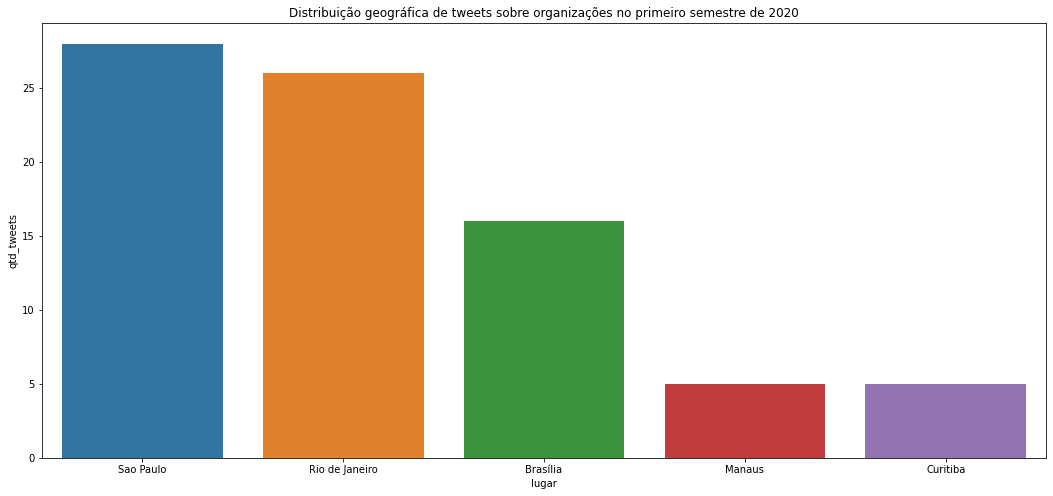

In [ ]:
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica de tweets sobre organizações no primeiro semestre de 2020')
ax = sns.barplot(x="lugar", y="qtd_tweets", data=df_cidade_org.iloc[0:5])

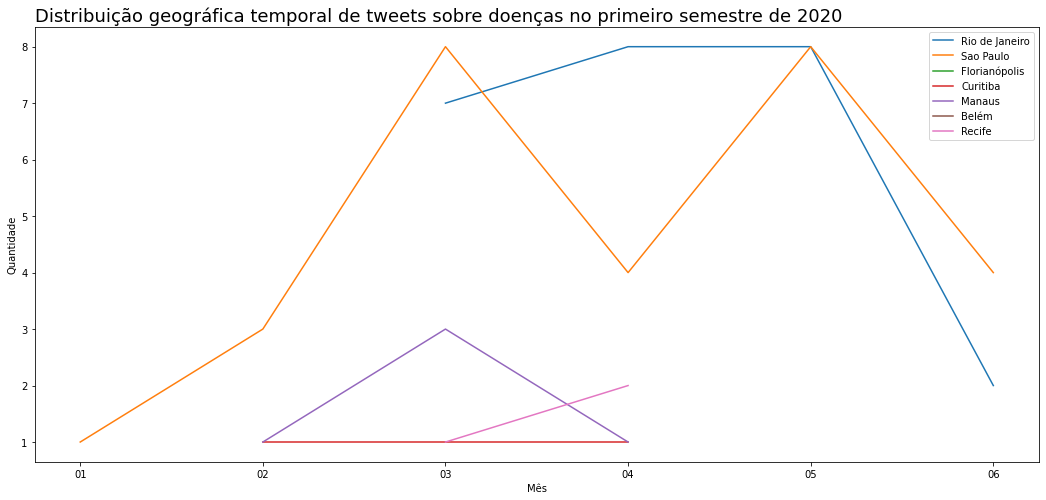

In [ ]:
# Distribuição temporal por cidade
df_temp_lugar_org = gen_pivot_by_data_agg(duvidas_local, field='lugar', subject=Tema.ORG)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre doenças no primeiro semestre de 2020', fontsize=18, loc='left')
cidades_org_search = ['Rio de Janeiro', 'Sao Paulo', 'Florianópolis', 'Curitiba', 'Manaus', 'Belém', 'Recife']
for cidade in cidades_org_search:
  plt.plot(df_temp_lugar_org[cidade], label=cidade)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

#### 7.2.3.2 Distribuição por região

In [ ]:
#TODO Verificar distribuição total por região

In [ ]:
df_regiao_ppl = gen_df_by_search(duvidas_local, Tema.ORG, 'temas')
df_regiao_ppl = df_regiao_ppl.groupby(["regiao"]).agg(
    qtd_tweets=pd.NamedAgg(column="regiao", aggfunc="count")
)
df_regiao_ppl.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_regiao_ppl.reset_index(inplace=True)

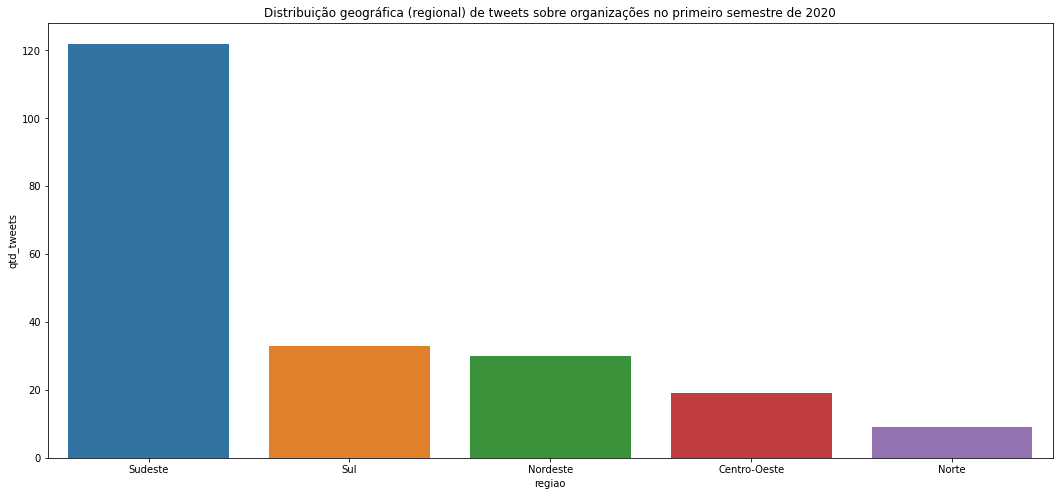

In [ ]:
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica (regional) de tweets sobre organizações no primeiro semestre de 2020')
ax = sns.barplot(x="regiao", y="qtd_tweets", data=df_regiao_ppl.iloc[0:5])

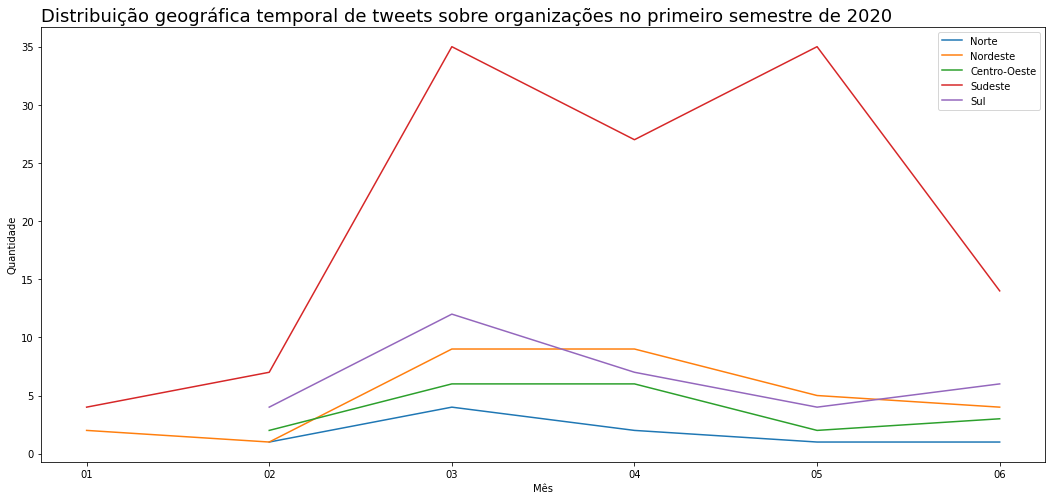

In [ ]:
# Distribuição temporal por região
df_temp_regiao_org = gen_pivot_by_data_agg(duvidas_local, field='regiao', subject=Tema.ORG)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre organizações no primeiro semestre de 2020', fontsize=18, loc='left')
regioes_org_search = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
for regiao in regioes_org_search:
  plt.plot(df_temp_regiao_org[regiao], label=regiao)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

### 7.2.4 Pessoas

#### 7.2.4.1 Distribuição por cidades

In [ ]:
df_cidade_ppl = gen_df_by_search(duvidas_local, Tema.PESSOAS, 'temas')
df_cidade_ppl = df_cidade_ppl.groupby(["lugar"]).agg(
    qtd_tweets=pd.NamedAgg(column="lugar", aggfunc="count")
)
df_cidade_ppl.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_cidade_ppl.reset_index(inplace=True)

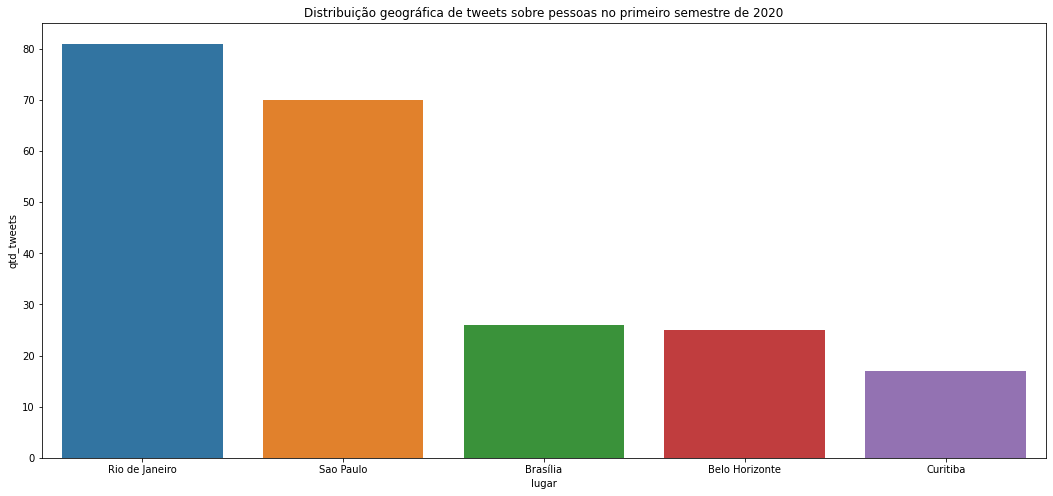

In [ ]:
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica de tweets sobre pessoas no primeiro semestre de 2020')
ax = sns.barplot(x="lugar", y="qtd_tweets", data=df_cidade_ppl.iloc[0:5])

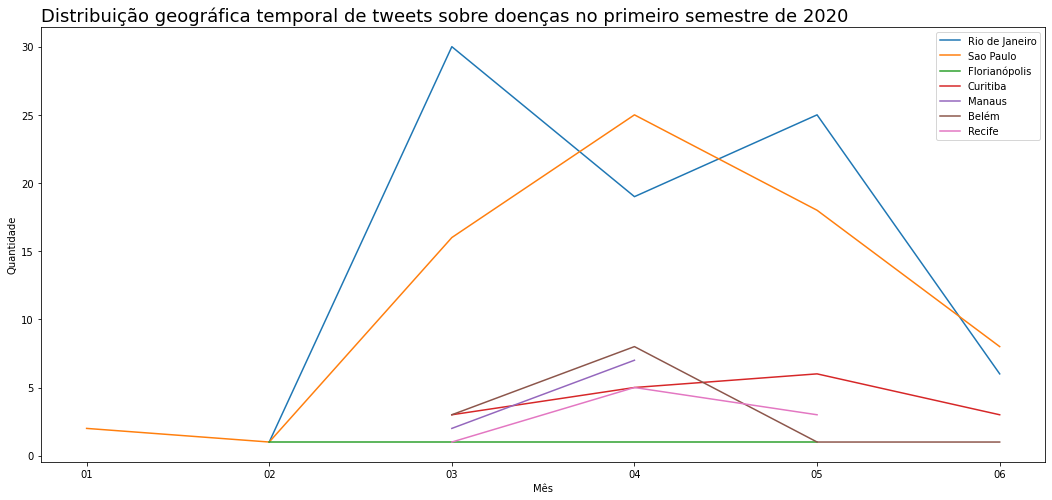

In [ ]:
# Distribuição temporal por cidade
df_temp_lugar_pess = gen_pivot_by_data_agg(duvidas_local, field='lugar', subject=Tema.PESSOAS)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre doenças no primeiro semestre de 2020', fontsize=18, loc='left')
cidades_pess_search = ['Rio de Janeiro', 'Sao Paulo', 'Florianópolis', 'Curitiba', 'Manaus', 'Belém', 'Recife']
for cidade in cidades_pess_search:
  plt.plot(df_temp_lugar_pess[cidade], label=cidade)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

#### 7.2.4.2. Distribuição por regiões

In [ ]:
#TODO Verificar distribuição total por região

In [ ]:
df_regiao_ppl = gen_df_by_search(duvidas_local, Tema.PESSOAS, 'temas')
df_regiao_ppl = df_regiao_ppl.groupby(["regiao"]).agg(
    qtd_tweets=pd.NamedAgg(column="regiao", aggfunc="count")
)
df_regiao_ppl.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_regiao_ppl.reset_index(inplace=True)

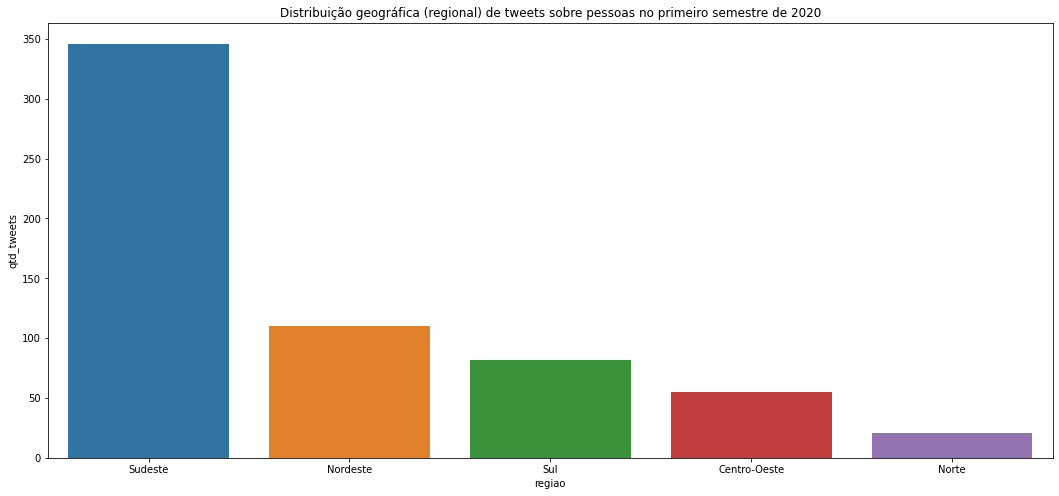

In [ ]:
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Distribuição geográfica (regional) de tweets sobre pessoas no primeiro semestre de 2020')
ax = sns.barplot(x="regiao", y="qtd_tweets", data=df_regiao_ppl.iloc[0:5])

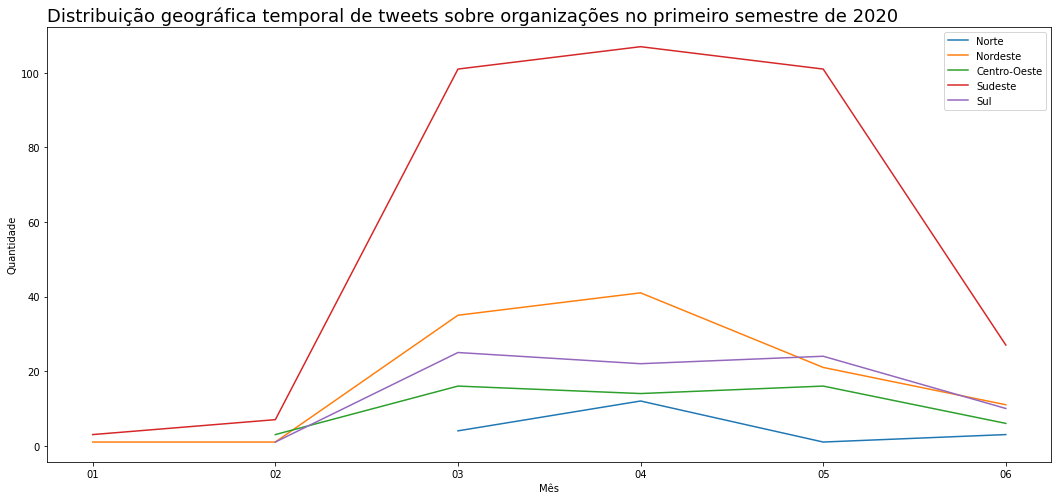

In [ ]:
# Distribuição temporal por região
df_temp_regiao_pess = gen_pivot_by_data_agg(duvidas_local, field='regiao', subject=Tema.PESSOAS)
dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)

ax.set_title('Distribuição geográfica temporal de tweets sobre organizações no primeiro semestre de 2020', fontsize=18, loc='left')
regioes_pess_search = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
for regiao in regioes_pess_search:
  plt.plot(df_temp_regiao_pess[regiao], label=regiao)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend();

# Outras Informações

In [ ]:
df_fls = duvidas_db[:]
df_fls.sort_values(by=['seguidores'], ascending=False, inplace=True)
df_fls.reset_index(inplace=True)
df_fls[0:10]

Neste dataset, o usuário que possui mais seguidores é o apresentador Luciano Huck - o qual, nos últimos anos, tem figurado para concorrer a presidência da República - seguido pelo portal de notícias G1.
<br>
Apresenta um diferença com relação aos dados brutos, no qual o presidente do Estados Unidos da América é o usuário que possui a maior quantidade de seguidores, seguido pelas agências de notícias Reuters e CNN (Espanha). 
No Brasil, neste dataset, o que possui mais seguidores é o humorista Danilo Gentili.

In [ ]:
df_fls = raw_data[:]
df_fls.sort_values(by=['seguidores'], ascending=False, inplace=True)
df_fls.reset_index(inplace=True)
df_fls[0:10]

# Referências

A. Abd-Alrazaq, D. Alhuwail, M. Househ, M. Hamdi, and Z. Shah. Top concerns of tweeters during the covid-19 pandemic: infoveillance study. Journal of medical Internet research, 22(4):e19016, 2020.

A. P. Gopi, R. N. S. Jyothi, V. L. Narayana, and K. S. Sandeep. Classification of tweets data based on polarity using improved rbf kernel of svm. International Journal of Information Technology, pages 1–16, 2020.

C. Ordun, S. Purushotham, and E. Raff. Exploratory analysis of covid-19 tweets using topic modeling, umap, and digraphs. arXiv preprint arXiv:2005.03082, 2020.

E. H.-J. Kim, Y. K. Jeong, Y. Kim, K. Y. Kang, and M. Song. Topic-based content and sentiment analysis of ebola virus on twitter and in the news. Journal of Information Science, 42(6):763–781, 2016.

GREGIANIN, Leonardo. Data collection of geographical divisions of Brazil by IBGE. Disponível em: https://github.com/leogregianin/ibge. Acesso em 06 de Outubro de 2020.

H. Du, L. Nguyen, Z. Yang, H. Abu-Gellban, X. Zhou, W. Xing, G. Cao, and F. Jin. Twitter vs news: Concern analysis of the 2018 california wildfire event. In 2019 IEEE 43rd Annual Computer Software and Applications Conference (COMPSAC), volume 2, pages 207–212. IEEE, 2019.

L. Li, Q. Zhang, X. Wang, J. Zhang, T. Wang, T.-L. Gao, W. Duan, K. K.-f. Tsoi, and F.-Y. Wang. Characterizing the propagation of situational information in social media during covid19 epidemic: A case study on weibo. IEEE Transactions on Computational Social Systems, 7(2):556–562, 2020.

M. Malta, A. W. Rimoin, and S. A. Strathdee. The coronavirus 2019-ncov epidemic: Is
hindsight 20/20? EClinicalMedicine, 20, 2020.

MIKULSKI, Bartosz. How to split a list inside a Dataframe cell into rows in Pandas. Disponível em: https://www.mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas/. Acesso em 29 de setembro de 2020.

Q. Liu, Z. Zheng, J. Zheng, Q. Chen, G. Liu, S. Chen, B. Chu, H. Zhu, B. Akinwunmi, J. Huang, et al. Health communication through news media during the early stage of the covid-19 outbreak in china: Digital topic modeling approach. Journal of medical Internet research, 22(4):e19118, 2020.

T. de Melo and C. M. Figueiredo. A first public dataset from brazilian twitter and news on covid-19 in portuguese. Data in Brief, page 106179, 2020.

W. H. Organization et al. Coronavirus disease 2019 (covid-19): situation report, 126. 2020.